In [126]:
%matplotlib inline
print ('Loading LSOA polygons ...')

import geopandas as gpd

#using geopandas to load LSOA polygon file in London
filepath="LondonLSOA.geojson" 
lsoa_polygon_data = gpd.read_file(filepath)
lsoa_polygon_data = lsoa_polygon_data.rename(columns={'LSOA11CD': 'lsoa11'})



Loading LSOA polygons ...


In [127]:
import pandas as pd
sales_data_frame = pd.read_csv('london_sales_2013_2014.csv')#, delimiter=',')

# print (sales_data_frame[['transaction_id', 'price', 'lsoa11']])
lsoa_mean_prices = (sales_data_frame.groupby('lsoa11').mean())[['price']]
lsoa_mean_prices.reset_index(level=0, inplace=True)

lsoa_polygon_prices = pd.merge(lsoa_polygon_data[['lsoa11','geometry', 'LSOA11NM']], lsoa_mean_prices, on='lsoa11')


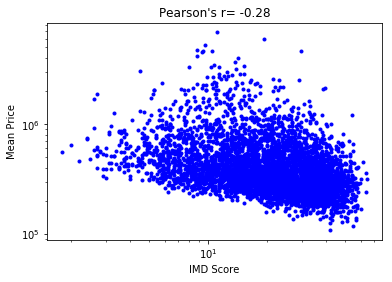

In [190]:
lsoa_socioeconomic = pd.read_csv('lsoa_imd_london.csv')
# print (lsoa_socioeconomic[['Local Authority District code (2013)','IMD Score']])
lsoa_to_imd = dict(zip(lsoa_socioeconomic['LSOA code (2011)'], lsoa_socioeconomic['IMD Score']))

lsoa_polygon_prices['IMD Score'] =  lsoa_polygon_prices['lsoa11'].map(lsoa_to_imd)

corr = lsoa_polygon_prices['IMD Score'].corr(lsoa_polygon_prices['price'])

import pylab as plt
plt.loglog(lsoa_polygon_prices['IMD Score'], lsoa_polygon_prices['price'], 'b.')
plt.xlabel('IMD Score')
plt.ylabel('Mean Price')
plt.title('Pearson\'s r= ' + (str(corr)[0:5]) )
# lsoa_polygon_prices.plot(kind='scatter', x='IMD Score', y='price');

In [149]:
from geopandas import GeoDataFrame

# shape = shapely.geometry.asShape(polygon)
# print(shape.bounds)

london_places = pd.read_csv('london_locations.csv')
london_places['geometry'] =  list(zip(london_places.latitude, london_places.longitude))
# print(london_places)
london_places = GeoDataFrame(london_places)
lsoa_mean_prices = GeoDataFrame(lsoa_polygon_prices)
print (lsoa_mean_prices.columns)
print (london_places.columns)
lsoa_place_frame = gpd.tools.sjoin(london_places, lsoa_mean_prices ,  how="left")
print(lsoa_place_frame)

Index(['lsoa11', 'geometry', 'LSOA11NM', 'price'], dtype='object')
Index(['place_id', 'latitude', 'longitude', 'category', 'checkins',
       'geometry'],
      dtype='object')


AttributeError: 'tuple' object has no attribute 'bounds'